In [12]:
import os
import cv2
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# from tensorflow.keras.applications.resnet import preprocess_input
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from keras.utils import to_categorical

In [13]:
# import kagglehub
# path = kagglehub.dataset_download("mohamedhanyyy/chest-ctscan-images")

# print("Path to dataset files:", path)


In [14]:
# generators
path_ ='C:\\Vishvajeet\\ML\\Lung Cancer\\ds\\train'
# path1=
train_ds = keras.utils.image_dataset_from_directory(
    directory='C:\\Vishvajeet\\ML\\Lung Cancer\\train',
    
    labels = 'inferred',
    label_mode='int',
    batch_size=16, #64
    image_size=(224,224)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory='C:\\Vishvajeet\\ML\\Lung Cancer\\test',
    labels = 'inferred',
    label_mode='int',
    batch_size=16, #64
    image_size=(224,224)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory='C:\\Vishvajeet\\ML\\Lung Cancer\\valid',
    labels = 'inferred',
    label_mode='int',
    batch_size=16, #64
    image_size=(224,224)
)

Found 613 files belonging to 4 classes.
Found 315 files belonging to 4 classes.
Found 72 files belonging to 4 classes.


In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define the input shape (e.g., for 224x224 RGB images)
input_shape = (224, 224, 3)

# Load the VGG16 model without the top dense layers
VGG16_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape
)

# Freeze all layers of the VGG16 model
for layer in VGG16_model.layers:
    layer.trainable = False

# Print the summary of the VGG16 base model
VGG16_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:

# Normalise
# def process(image,label):
#     image = tf.cast(image/255,tf.float32)
#     return image,label

def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize to 224x224
    image = tf.keras.applications.vgg16.preprocess_input(image)  # Preprocess for VGG16
    return image, label

train_ds = train_ds.map(preprocess)
validation_ds = validation_ds.map(preprocess)
test_ds = test_ds.map(preprocess)


# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [17]:

from keras.src.metrics.confusion_metrics import activations
model = Sequential()
model.add(VGG16_model)
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(4, 'softmax'))
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,125,892 (76.77 MB)

 Trainable params: 5,410,180 (20.64 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [18]:
# model.summary()

In [19]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])


In [20]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint('model.keras', save_best_only=True),  # Change .h5 to .keras
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]


In [21]:

history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.4440 - loss: 1.6790 - val_accuracy: 0.5556 - val_loss: 1.2602
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8678 - loss: 0.3625 - val_accuracy: 0.8056 - val_loss: 0.5917
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9381 - loss: 0.2363 - val_accuracy: 0.9028 - val_loss: 0.3536
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9616 - loss: 0.1762 - val_accuracy: 0.8889 - val_loss: 0.5587
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9795 - loss: 0.0838 - val_accuracy: 0.9306 - val_loss: 0.3838
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9729 - loss: 0.0886 - val_accuracy: 0.9028 - val_loss: 0.2716
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9526 - loss: 0.2767 - val_accuracy: 0.9028 - val_loss: 0.4573
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9919 - loss: 0.0767 - val_accuracy: 0.9028 - val_loss:

In [36]:
import pickle


# Load the Keras model
cnn_model = keras.models.load_model('cnn_model2.keras')


In [37]:
# Evaluate the model on the validation dataset

loss, accuracy = cnn_model.evaluate(test_ds, verbose=1)
# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.8362 - loss: 0.5708
Accuracy: 84.13%


In [ ]:
# model.save('cnn_model2.keras', save_format='keras')


In [24]:
y_pred_cnn = model.predict(test_ds)

# from sklear.metric import accuracy_score

print(y_pred_cnn)


20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step
[[2.7193011e-05 9.9829608e-01 2.4065243e-05 1.6526901e-03]
 [9.1683358e-22 2.1989153e-22 1.0000000e+00 1.4744310e-21]
 [3.0104324e-01 1.0860857e-01 3.2484825e-03 5.8709973e-01]
 ...
 [8.0585390e-01 1.5919419e-01 5.6188307e-03 2.9333033e-02]
 [7.5747622e-08 3.8169787e-06 2.9331535e-08 9.9999607e-01]
 [9.9952066e-01 3.9923779e-04 1.4102693e-06 7.8728190e-05]]


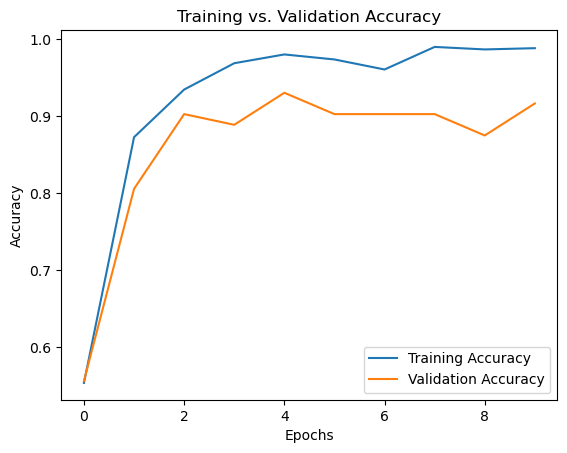

In [25]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model training
# history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

# Plotting accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()


In [26]:
# class_names = train_ds.class_names
# print("Class Names:", class_names)
# print("Number of Classes:", len(class_names))


## SVM

In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, MaxPooling2D

# Load Pre-trained VGG16 without the top layer
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Add MaxPooling and Flatten
x = MaxPooling2D(pool_size=(2, 2))(base_model.output)  # Additional pooling
x = Flatten()(x)  # Convert feature maps into a vector

# Define feature extractor model
feature_extractor = Model(inputs=base_model.input, outputs=x)


In [28]:
import numpy as np
from sklearn.svm import SVC  # Import Support Vector Classifier


# Function to extract features
def extract_features(dataset):
    features = []
    labels = []
    for images, lbls in dataset:  # Iterate over dataset batches
        feature_vectors = feature_extractor.predict(images)  # Extract features
        features.append(feature_vectors)
        labels.append(lbls.numpy())  # Convert labels to NumPy array
    
    return np.vstack(features), np.hstack(labels)

# Extract features from datasets
X_train, y_train = extract_features(train_ds)
X_val, y_val = extract_features(validation_ds)
X_test, y_test = extract_features(test_ds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [29]:
# Train SVM model
svm = SVC(kernel='rbf', C=1.0)  # RBF SVM
svm.fit(X_train, y_train)

# Evaluate on validation set
val_accuracy = svm.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}")


Validation Accuracy: 0.83


In [30]:
test_accuracy = svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.92


In [31]:
# from sklearn.tree import DecisionTreeClassifier 

# dec_Tree = 



In [32]:
y_pred = model.predict(test_ds)
y_pred_labels = np.argmax(y_pred, axis=1)  # If using Softmax

y_pred_svm = svm.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step


In [33]:
print(y_pred_cnn)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)
print(y_pred_cnn_labels)
# print(len(y_pred_svm))

[[2.7193011e-05 9.9829608e-01 2.4065243e-05 1.6526901e-03]
 [9.1683358e-22 2.1989153e-22 1.0000000e+00 1.4744310e-21]
 [3.0104324e-01 1.0860857e-01 3.2484825e-03 5.8709973e-01]
 ...
 [8.0585390e-01 1.5919419e-01 5.6188307e-03 2.9333033e-02]
 [7.5747622e-08 3.8169787e-06 2.9331535e-08 9.9999607e-01]
 [9.9952066e-01 3.9923779e-04 1.4102693e-06 7.8728190e-05]]
[1 2 3 3 3 0 0 3 0 3 3 3 0 3 3 1 0 0 1 3 3 2 3 1 3 1 1 1 3 0 0 0 1 3 1 1 3
 0 0 3 1 1 1 2 2 1 1 3 1 1 1 1 3 2 2 3 0 1 0 1 0 3 1 0 3 3 0 1 0 2 3 2 1 1
 0 3 2 2 1 2 3 3 0 0 0 3 1 0 3 0 0 0 0 0 1 2 0 0 2 2 2 2 0 0 1 3 0 1 0 2 1
 3 0 1 3 0 1 0 0 0 2 1 3 1 0 3 3 0 1 0 3 3 3 0 3 1 3 1 3 3 2 0 0 1 2 3 1 1
 3 3 1 3 2 1 3 2 1 0 2 1 2 0 0 3 0 1 3 0 1 3 0 0 2 1 3 2 2 0 1 3 0 2 3 1 0
 2 0 1 2 3 1 2 3 0 0 2 3 1 3 1 3 0 2 2 2 2 0 0 1 3 0 3 3 3 2 1 3 1 0 1 0 2
 1 0 2 2 1 3 2 3 3 2 1 2 3 0 3 3 3 3 0 1 1 1 1 1 1 0 3 1 1 2 3 1 2 0 3 3 0
 3 1 0 3 3 2 0 0 2 0 1 1 3 1 3 3 3 0 3 3 3 1 2 1 3 3 0 0 2 1 2 1 3 0 1 0 3
 0 3 0 0 3 1 0 1 3 0 2 0 1 2 3 3 0 3 0]


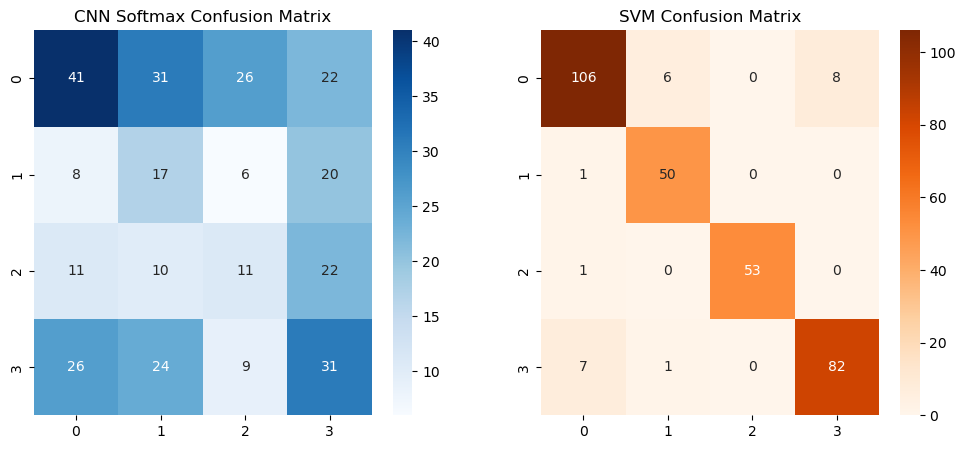

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_cnn = confusion_matrix(y_test, y_pred_cnn_labels)
cm_svm = confusion_matrix(y_test, y_pred_svm)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("CNN Softmax Confusion Matrix")
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
plt.show()


In [38]:
print(y_pred_svm)

[0 0 1 0 1 2 0 2 0 0 2 2 1 3 0 3 3 3 0 2 3 2 1 2 3 3 3 3 3 3 2 3 3 2 1 3 0
 0 0 1 1 2 1 1 1 3 3 0 3 0 0 0 1 0 3 1 3 3 3 0 3 3 3 0 1 3 0 0 3 1 3 2 1 0
 1 3 3 2 2 2 0 2 3 2 0 3 0 0 3 0 1 3 3 3 0 0 0 2 2 2 0 3 0 0 3 3 0 0 1 0 2
 1 2 0 0 2 0 0 0 3 3 0 3 3 3 0 3 3 1 3 2 3 0 1 2 2 2 1 0 0 0 3 0 1 1 2 1 0
 0 1 0 1 0 2 1 0 3 0 0 2 3 0 3 1 2 0 3 3 3 2 2 1 3 0 0 0 0 0 3 2 0 0 0 3 3
 2 3 1 1 0 1 0 0 3 0 3 2 1 3 1 1 3 3 0 0 1 0 0 3 2 0 1 3 3 2 0 0 0 3 1 3 0
 1 0 2 0 0 0 0 3 3 0 1 3 1 3 0 0 2 0 0 1 3 0 0 0 3 0 3 3 2 2 0 1 0 0 0 2 0
 2 1 0 1 2 0 0 0 3 3 0 2 0 2 1 3 1 1 3 0 1 0 1 0 2 2 1 3 1 1 2 3 1 1 3 0 3
 2 3 0 2 0 0 2 3 1 3 0 0 0 0 3 3 0 2 0]


In [52]:
import joblib

# Load the model
with open('svm_prob_model2.pkl', 'rb') as f:
    svm_model2 = joblib.load(f)  

# Get class probabilities instead of labels
y_pred_probs = svm_model2.predict_proba(X_test)

print(y_pred_probs)  # This prints probability scores for each class


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.3.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[[8.50076489e-01 2.45617489e-02 1.31374759e-03 1.24048014e-01]
 [6.45132702e-01 1.99072581e-01 5.89263562e-03 1.49902081e-01]
 [1.81889215e-01 6.57451796e-01 3.25017374e-03 1.57408816e-01]
 ...
 [7.58789132e-01 6.05208493e-02 9.26946280e-04 1.79763072e-01]
 [4.94611154e-03 6.41654981e-03 9.84581749e-01 4.05558987e-03]
 [7.52897012e-01 1.79335140e-01 1.03267273e-03 6.67351753e-02]]


[0 0 1 0 1 2 0 2 0 0 2 2 1 3 0 3 3 3 0 2 3 2 1 2 3 3 3 3 3 3 2 3 3 2 1 3 0
 0 0 1 1 2 1 1 1 3 3 0 3 0 0 0 1 0 3 1 3 3 3 0 3 3 3 0 1 3 0 0 3 1 3 2 1 0
 1 3 3 2 2 2 0 2 3 2 0 3 0 0 3 0 1 3 3 3 0 0 0 2 2 2 0 3 0 0 3 3 0 0 1 0 2
 1 2 0 0 2 0 0 0 3 3 0 3 3 3 0 3 3 1 3 2 3 0 1 2 2 2 1 0 0 0 3 0 1 1 2 1 0
 0 1 0 1 0 2 1 0 3 0 0 2 3 0 3 1 2 0 3 3 3 2 2 1 3 0 0 0 0 0 3 2 0 0 0 3 3
 2 3 1 1 0 1 0 0 3 0 3 2 1 3 1 1 3 3 0 0 1 0 0 3 2 0 1 3 3 2 0 0 0 3 1 3 0
 1 0 2 0 0 0 0 3 3 0 1 3 1 3 0 0 2 0 0 1 3 0 0 0 3 0 3 3 2 2 0 1 0 0 0 2 0
 2 1 0 1 2 0 0 0 3 3 0 2 0 2 1 3 1 1 3 0 1 0 1 0 2 2 1 3 1 1 2 3 1 1 3 0 3
 2 3 0 2 0 0 2 3 1 3 0 0 0 0 3 3 0 2 0]


In [98]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('svm', LogisticRegression(C=1, solver='lbfgs')),
    ('cnn', RandomForestClassifier(n_estimators=100))
]

# Meta-model
meta_model = LogisticRegression()

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3)
stacking_clf.fit(X_meta, y_test)

# Predict and compute accuracy
y_pred_meta = stacking_clf.predict(X_meta_test)
meta_accuracy = accuracy_score(y_test, y_pred_meta)
print(f"Stacking Meta Model Accuracy: {meta_accuracy:.4f}")

Stacking Meta Model Accuracy: 0.9429


In [ ]:
# import joblib

# # Save the model
# joblib.dump(stacking_clf, 'stacking_model.pkl')
# print("Model saved successfully!")


Model saved successfully!


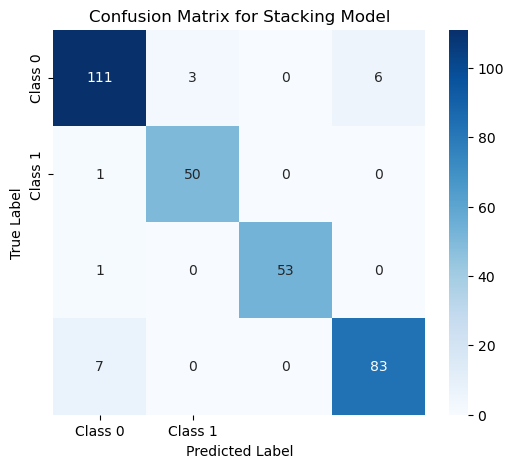

Stacking Meta Model Accuracy: 0.9429


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_meta)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Stacking Model')
plt.show()

# Print accuracy
meta_accuracy = accuracy_score(y_test, y_pred_meta)
print(f"Stacking Meta Model Accuracy: {meta_accuracy:.4f}")
